# <span style= 'color:blue'><h1> Partie 1:Introduction aux réseaux convolutionnels:</h1> </span>
---

# <span style= 'color:black'><h3> Questions 1 :</h3> </span>
---

X_output = ( ( x - k + 2 * p ) / s ) + 1

Y_output = ( ( y - k + 2 * p ) / s ) + 1

# <span style= 'color:black'><h4> a/ </h4> </span>
---

poids = k * k * z + 1 

# <span style= 'color:black'><h4> b/ </h4> </span>
---

poids_fully_connected = ( x * y * z ) * ( X_output * Y_output ) + ( X_output * Y_output ) * 1

# <span style= 'color:black'><h4> 2/ </h4> </span>
---

les avantages de CNN sont :


-le CNN utilise moins de ressources et rapide en terme de calcul que fully connected pour s'entrainer(reduction des dimension ,moins  de connections avec input layer) et plus rapide en terme de temps et argent

-ne traite pas les pixel local comme les pixels au bord eloignees

-bon pour la localistaion d'un objet dans une image

les disavantages de CNN sont :

le CNN ne tient pas compte de rotation et scaling ou preprocessing de l'image

# <span style= 'color:black'><h4> 3/ </h4> </span>
---

-reduction en terme de calcul

-reduction  de l'overfitting grace a la reduction des poids

-le modele est tolerant aux variations, aux distorsions

# <span style= 'color:black'><h4> 4/ </h4> </span>
---

c 'est faisable de facon que le dimension de l 'image soit le meme dimension des filtres si on append tous ensemble 

# <span style= 'color:black'><h4> 5/ </h4> </span>
---

fully connected c 'est un filtre 1D donc on peut  avoir un couche fully connected comme couche convolutions si sa dimension est le meme celle de la feature map et le produit conventionnel et meme on 1D (prouit conventionnel de 
feature map flattener en 1D avec couche fully connected)

# <span style= 'color:black'><h4> 6/ </h4> </span>
---

si on fait convertir les fully coonected on des filtres de meme dimension que les features map dans chaque couche oui ,le resultat de sortie est un scalaire 
et son interet est : edge detection .

# <span style= 'color:black'><h4> 7/ </h4> </span>
---

la formule general de receiptive size est :

R_i =  R_i-1  + ( K - 1 ) * (S_0 * S_1 * ..... * S_i-1) avec R_i=dimension de receiptive field a la i eme couche convenutionnel

pour VGG16 on a:

1-premiere couche de convolution:

K=3,S=1,R_0=1

R_1 = 1 + ( 3 - 1) * 1 = 3 donc dimension perceiptive=( 3 * 3 )

2-deuxieme couche de convolution:

K=3,S=1,R_1=3

R_2 = 3 + ( 3 - 1) * 1 * 1 = 5   donc dimension perceiptive=( 5 * 5 )

pour des couches plus profondes ,la dimension de champ recepteur augmente , ce qui explique 
qu il couvre une grande surface de l image 
donc pour la 1 ere couche il est capable de voir  que les edges qui n est pas besoin 
de beaucoup d information de  l image ,en passant a la deuxieme couche , on collecte plus 
d information de l image ,et beaucoup d autre operation peuvent ces couches profondes de convoltion le faire
donc la capacite a s entrainer et apprendre  augmente .

# <span style= 'color:blue'><h1> Partie 2: Apprentissage from scratch du modèle:</h1> </span>
---

# <span style= 'color:black'><h3> 1/</h3> </span>
---

s=1,p=2

# <span style= 'color:black'><h3> 2/</h3> </span>
---

s=2,p=0

# <span style= 'color:black'><h3> 3/</h3> </span>
---

conv1 -> sortie: 32 * 32 * 32 , poids : ( 5 * 5 * 3 + 1 ) * 32 = 2432

pool1 -> sortie: 16 * 16 * 32 , poids : 0

conv2 -> sortie: 16 * 16 * 64 , poids : ( 5 * 5 * 32 + 1 ) * 64 = 51264

pool2 -> sortie: 8 * 8 * 64 , poids : 0

conv3 -> sortie: 8 * 8 * 64 , poids :( 5 * 5 * 64 + 1 ) * 64 = 102464

pool3 ->  sortie: 4 * 4 * 64 , poids : 0

fc4 -> sortie: 4 * 4 * 64 = 1024  , poids : ( 1024 + 1 ) * 1000 = 1025000

fc5 -> sortie: 1000 , poids : ( 1000 + 1 ) * 10 = 10010     

la dimension par rapport dimension d image d origine  diminue en allant en profond avec polling d un facteur 2 chaque couche ->  la dimension de l input de fc est plus petit que dimension input de l image d origine si on a travailler directement avec l image origine(ann)

# <span style= 'color:black'><h3> 4/</h3> </span>
---

poids totale notre exemple = 1191352

poids total VGG16 = 138000000

poids totale notre exemple << poids total VGG16

# <span style= 'color:black'><h3> 5/</h3> </span>
---

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

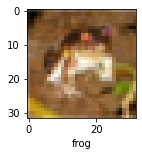

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=1,activation='relu',padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5),strides=1, activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1,activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

# <span style= 'color:black'><h3> 6/</h3> </span>
---

In [14]:
history=cnn.fit(X_train, y_train, epochs=50,validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 20s 6ms/step - loss: 1.7763 - accuracy: 0.4069 - val_loss: 1.3825 - val_accuracy: 0.5126
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3231 - accuracy: 0.5274 - val_loss: 1.3181 - val_accuracy: 0.5380
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1987 - accuracy: 0.5800 - val_loss: 1.2101 - val_accuracy: 0.5893
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1157 - accuracy: 0.6103 - val_loss: 1.1806 - val_accuracy: 0.6004
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0422 - accuracy: 0.6382 - val_loss: 1.1500 - val_accuracy: 0.6046
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9923 - accuracy: 0.6545 - val_loss: 1.2372 - val_accuracy: 0.5855
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9376 - accuracy: 0.6763 - val_loss: 1.1895 - val_accuracy

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.5051 - accuracy: 0.5972


[2.5050692558288574, 0.5971999764442444]

In [16]:
y_pred=cnn.predict(X_test)

In [17]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [3, 1, 8, 8, 4, 6, 1, 6, 3, 1]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [18]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.63      0.66      1000
           1       0.73      0.74      0.74      1000
           2       0.51      0.46      0.48      1000
           3       0.35      0.43      0.39      1000
           4       0.52      0.50      0.51      1000
           5       0.45      0.57      0.50      1000
           6       0.72      0.60      0.65      1000
           7       0.69      0.66      0.67      1000
           8       0.83      0.64      0.72      1000
           9       0.66      0.75      0.70      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



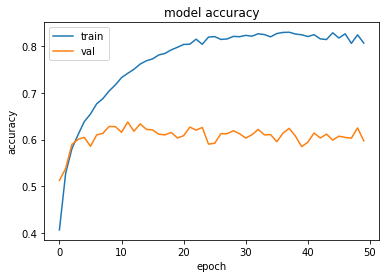

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

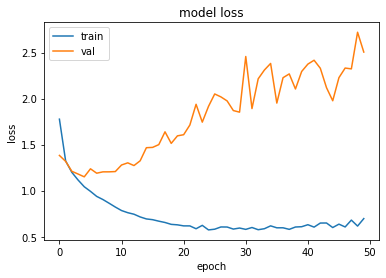

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <span style= 'color:black'><h3> 7/</h3> </span>
---

Le taux d'apprentissage est un hyperparamètre qui contrôle le degré de modification du modèle en réponse à l'erreur estimée chaque fois que les poids du modèle sont mis à jour. Le choix du taux d'apprentissage est difficile car une valeur trop petite peut entraîner un long processus d'entraînement qui pourrait rester bloqué, tandis qu'une valeur trop grande peut entraîner l'apprentissage trop rapide d'un ensemble de poids sous-optimal ou un processus d'entraînement instable.

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.01)
# cnn.compile(optimizer=opt,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# cnn.fit(X_train, y_train, epochs=20)

In [ ]:
# cnn.evaluate(X_test,y_test)

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.1)
# cnn.compile(optimizer=opt,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# cnn.fit(X_train, y_train, epochs=20)

In [ ]:
# cnn.evaluate(X_test,y_test)

mini batch est le nombre d echantillons pour chaque iteration qui est entre 1 et nombre totale des echantillons,
si on augmente mini batch donc accuracy augmente mais le temps d entraiment augmente aussi,si on diminue ,le temps d 'entrainement diminue mais on risque de pas avoir le bon accuracy 

In [ ]:
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# cnn.fit(X_train, y_train,batch_size=10, epochs=20)

In [ ]:
# cnn.evaluate(X_test,y_test)

In [ ]:
# cnn.fit(X_train, y_train,batch_size=100, epochs=20)

In [ ]:
# cnn.evaluate(X_test,y_test)

# <span style= 'color:black'><h4> 8/ </h4> </span>
---

loss=la multiplication du  résultat réel par le logarithme du résultat produit par le modèle pour chaque classe, puis nous les additionnons

loss = ( y_reel_0 * log ( y_pred_0 ) ) + ( y_reel_1 * log ( y_pred_1 ) ) + ( y_reel_2 * log ( y_pred_2 ) ) + ..... + ( y_reel_m * log ( y_pred_m ) ) ,avec m l indice  du dernier  classe (sparse crossentropy)

loss diminue si  y_pred augmente ,loss = 0 si y_pred = 1

# <span style= 'color:black'><h4> 9/ </h4> </span>
---

->on a dans la courbe de loss ,a partir de la deuxieme epoch ,pour train set ,loss diminue jusqu a valeur proche de 0 tandis que pour validation set loss continue a augmenter ,de plus a la 50 epochs on remarque un grande difference au niveau de l 'accuracy de train 0.80 et validation 0.59,on peut ameliorer les resultats avec data augmentation ou dropout  .ce   phenomene est l overfitting. 

# <span style= 'color:blue'><h1> Partie 3: Améliorations des résultats:</h1> </span>
---

# <span style= 'color:black'><h4> 1/ </h4> </span>
---

In [11]:
means_x = X_train.mean(axis=(0,1,2), keepdims=True)
means_x

array([[[[125.30691805, 122.95039414, 113.86538318]]]])

In [12]:
means_x.shape

(1, 1, 1, 3)

In [13]:
std_x=X_train.std(axis=(0,1,2), keepdims=True)
std_x

array([[[[62.99321928, 62.08870764, 66.70489964]]]])

In [14]:
std_x.shape

(1, 1, 1, 3)

In [15]:
X_train_stand=(X_train-means_x)/std_x
X_train_stand

array([[[[-1.05260405e+00, -9.81666336e-01, -7.62543433e-01],
         [-1.30659965e+00, -1.23936215e+00, -1.03238868e+00],
         [-1.19547658e+00, -1.20715017e+00, -1.06237148e+00],
         ...,
         [ 5.18993668e-01,  1.45752846e-01, -8.79303202e-02],
         [ 4.23745321e-01,  3.30109280e-02, -1.77878735e-01],
         [ 3.60246424e-01,  1.69049397e-02, -1.62887333e-01]],

        [[-1.73521721e+00, -1.65811785e+00, -1.40717374e+00],
         [-1.98921280e+00, -1.98023761e+00, -1.70700179e+00],
         [-1.70346776e+00, -1.85138971e+00, -1.70700179e+00],
         ...,
         [-3.66216884e-02, -5.62910640e-01, -8.82474653e-01],
         [-1.00120586e-01, -6.43440581e-01, -9.57431666e-01],
         [-5.24964129e-02, -5.79016628e-01, -8.52491848e-01]],

        [[-1.59234469e+00, -1.59369389e+00, -1.39218234e+00],
         [-1.73521721e+00, -1.86749569e+00, -1.70700179e+00],
         [-1.21135130e+00, -1.54537593e+00, -1.58707057e+00],
         ...,
         [-1.15995311e-0

In [16]:
X_test_stand=(X_test-means_x)/std_x
X_test_stand

array([[[[ 5.18993668e-01, -1.76366920e-01, -9.72423068e-01],
         [ 5.34868393e-01, -1.92472908e-01, -1.00240587e+00],
         [ 6.30116740e-01, -1.11942967e-01, -9.42440263e-01],
         ...,
         [ 1.85624454e-01, -4.50168722e-01, -1.16731130e+00],
         [ 1.10024850e-02, -5.14592675e-01, -1.16731130e+00],
         [-1.47744760e-01, -6.11228605e-01, -1.21228551e+00]],

        [[ 4.23745321e-01, -1.76366920e-01, -9.42440263e-01],
         [ 4.07870597e-01, -2.08578897e-01, -1.10734569e+00],
         [ 5.34868393e-01, -1.44154943e-01, -1.03238868e+00],
         ...,
         [ 1.69749730e-01, -4.50168722e-01, -1.24226831e+00],
         [-4.87223943e-03, -5.14592675e-01, -1.22727691e+00],
         [-1.00120586e-01, -5.62910640e-01, -1.19729411e+00]],

        [[ 4.07870597e-01, -2.08578897e-01, -1.00240587e+00],
         [ 4.07870597e-01, -2.24684885e-01, -1.21228551e+00],
         [ 5.18993668e-01, -1.92472908e-01, -1.16731130e+00],
         ...,
         [ 2.17373903e-0

In [19]:
history=cnn.fit(X_train_stand, y_train, epochs=50,validation_data=(X_test_stand, y_test))

Epoch 1/50
1563/1563 [==============================] - 12s 6ms/step - loss: 1.3314 - accuracy: 0.5246 - val_loss: 1.0397 - val_accuracy: 0.6309
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9214 - accuracy: 0.6796 - val_loss: 0.9636 - val_accuracy: 0.6671
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7423 - accuracy: 0.7410 - val_loss: 0.8969 - val_accuracy: 0.6955
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6032 - accuracy: 0.7882 - val_loss: 0.8759 - val_accuracy: 0.7219
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4833 - accuracy: 0.8312 - val_loss: 0.9505 - val_accuracy: 0.7125
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3796 - accuracy: 0.8658 - val_loss: 0.9888 - val_accuracy: 0.7181
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2974 - accuracy: 0.8966 - val_loss: 1.1555 - val_accuracy

In [20]:
cnn.evaluate(X_test_stand,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 6.0093 - accuracy: 0.7007


[6.009261608123779, 0.7006999850273132]

In [21]:
y_pred=cnn.predict(X_test_stand)

In [22]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [3, 8, 8, 0, 6, 6, 3, 6, 3, 1]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [23]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      1000
           1       0.82      0.82      0.82      1000
           2       0.60      0.63      0.61      1000
           3       0.52      0.48      0.50      1000
           4       0.60      0.71      0.65      1000
           5       0.65      0.55      0.59      1000
           6       0.76      0.74      0.75      1000
           7       0.72      0.76      0.74      1000
           8       0.79      0.84      0.81      1000
           9       0.85      0.72      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



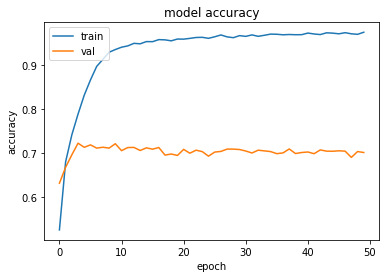

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

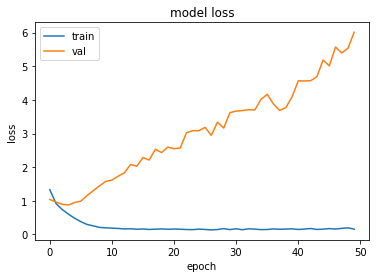

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

->le model converge rapidement a partir de la 1 epoch on a une accuracy de 0.52 pour train et test on a une accuracy 0.63 ,a la 50 epochs on accuracy 0.97 pour train et 0.7 pour validation ,mais deux valeur sont trop different.pour le loss il est diminuer mais il reste encore la courbe de validation est au dessus de  celle de train ,loss augmente pour validation tandis que il tends vers 0 pour train ,encore sur-apprentissage 

# <span style= 'color:black'><h4> 2/ </h4> </span>
---

La raison en est que nous voulons prétendre que les données de test sont de "nouvelles données invisibles". Nous utilisons l'ensemble de données de test pour obtenir une bonne estimation des performances de notre modèle sur toutes les nouvelles données.

Maintenant, dans une application réelle, les nouvelles données invisibles pourraient être juste 1 point de données que nous voulons classer. (Comment estimer la moyenne et l'écart type si nous n'avons qu'un seul point de données ?) C'est un cas intuitif pour montrer pourquoi nous devons conserver et utiliser les paramètres de données d'apprentissage pour mettre à l'échelle l'ensemble de test.

# <span style= 'color:black'><h4> 3/ </h4> </span>
---

In [13]:
X_train_minMax=(X_train-0)/(255-0)
X_train_minMax

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
X_test_minMax=(X_test-0)/(255-0)
X_test_minMax

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [15]:
history=cnn.fit(X_train_minMax, y_train, epochs=50,validation_data=(X_test_minMax, y_test))

Epoch 1/50
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4111 - accuracy: 0.4884 - val_loss: 1.1579 - val_accuracy: 0.5935
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9953 - accuracy: 0.6489 - val_loss: 0.9693 - val_accuracy: 0.6623
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8084 - accuracy: 0.7139 - val_loss: 0.9186 - val_accuracy: 0.6867
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6651 - accuracy: 0.7680 - val_loss: 0.8556 - val_accuracy: 0.7096
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5336 - accuracy: 0.8104 - val_loss: 0.9277 - val_accuracy: 0.6984
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4229 - accuracy: 0.8513 - val_loss: 0.9892 - val_accuracy: 0.7061
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3187 - accuracy: 0.8886 - val_loss: 1.0775 - val_accuracy

In [16]:
cnn.evaluate(X_test_minMax,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.9388 - accuracy: 0.6947


[4.938791751861572, 0.6947000026702881]

In [17]:
y_pred=cnn.predict(X_test_minMax)

In [18]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [3, 8, 8, 0, 6, 6, 1, 6, 3, 9]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [19]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.85      0.83      0.84      1000
           2       0.60      0.62      0.61      1000
           3       0.49      0.48      0.48      1000
           4       0.62      0.60      0.61      1000
           5       0.60      0.57      0.58      1000
           6       0.68      0.76      0.72      1000
           7       0.79      0.72      0.75      1000
           8       0.77      0.86      0.81      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



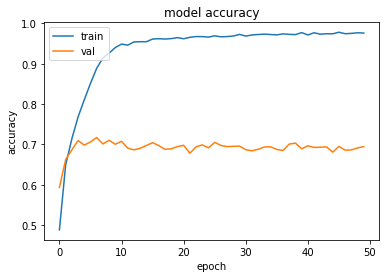

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

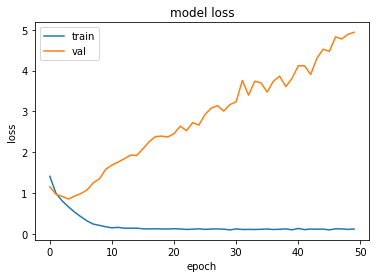

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


minmax scalar ce que on a x_scaled=(x-x_min)/(x_max-x_min)

les valeurs entre 0 et 1 model converge trop vite

->le model converge tres rapidement mais moins que standarscalar ,de la 3 ere epoch accuracy est 0.71 pour le train est 0.68 pour validation,a 50 epochs on des resultats moins que standarscalar mais plus proche, accuracy est 0.97 pour train et 0.69 pour test sont different encore trop . mais encore loss continue a augmenter plus que standarscalar normalisation pour validation  tandis que loss tends vers une valeur proche de 0 pour l  entrainement   ,encore de sur-apprentissage

# <span style= 'color:blue'><h1> Partie 4: Augmentation du nombre d'exemples d'apprentissage par data augmentation:</h1> </span>
---

# <span style= 'color:black'><h4> 1+2/ </h4> </span>
---

In [6]:
data_augmentation_train=keras.Sequential([
   tf.keras.layers.RandomCrop(28, 28),
    tf.keras.layers.RandomFlip(mode='horizontal')

    
])
data_augmentation_test=keras.Sequential([
   tf.keras.layers.RandomCrop(28, 28)

    
])

In [18]:
X_test_stand=data_augmentation_test(X_test_stand)
X_test_stand


<tf.Tensor: shape=(10000, 28, 28, 3), dtype=float32, numpy=
array([[[[ 6.30116761e-01, -1.11942969e-01, -9.42440271e-01],
         [ 6.45991445e-01, -7.97309875e-02, -9.12457466e-01],
         [ 5.50743103e-01, -1.76366925e-01, -1.01739728e+00],
         ...,
         [ 2.49123350e-01, -4.17956740e-01, -1.09235430e+00],
         [ 2.80872792e-01, -4.17956740e-01, -1.13732851e+00],
         [ 1.85624450e-01, -4.50168729e-01, -1.16731131e+00]],

        [[ 5.34868419e-01, -1.44154936e-01, -1.03238869e+00],
         [ 6.45991445e-01, -1.11942969e-01, -8.67483258e-01],
         [ 5.82492590e-01, -1.76366925e-01, -9.72423077e-01],
         ...,
         [ 2.64998078e-01, -4.17956740e-01, -1.13732851e+00],
         [ 2.80872792e-01, -4.01850760e-01, -1.19729412e+00],
         [ 1.69749737e-01, -4.50168729e-01, -1.24226832e+00]],

        [[ 5.18993676e-01, -1.92472905e-01, -1.16731131e+00],
         [ 6.61866188e-01, -1.92472905e-01, -9.87414479e-01],
         [ 5.50743103e-01, -2.73002863e-

In [19]:
cnn = models.Sequential([
    data_augmentation_train,
  
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=1,activation='relu',padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5),strides=1, activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1,activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2,padding='same'),
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history=cnn.fit(X_train_stand, y_train, epochs=50,validation_data=(X_test_stand, y_test))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4245 - accuracy: 0.4844 - val_loss: 1.2078 - val_accuracy: 0.5744
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0613 - accuracy: 0.6288 - val_loss: 0.9974 - val_accuracy: 0.6476
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9151 - accuracy: 0.6798 - val_loss: 0.9345 - val_accuracy: 0.6740
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8350 - accuracy: 0.7091 - val_loss: 0.8918 - val_accuracy: 0.6916
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7797 - accuracy: 0.7297 - val_loss: 0.9029 - val_accuracy: 0.6877
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7437 - accuracy: 0.7399 - val_loss: 0.8286 - val_accuracy: 0.7167
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7051 - accuracy: 0.7547 - val_loss: 0.8138 - val_ac

In [23]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)         

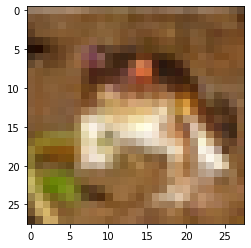

In [7]:
plt.imshow(data_augmentation_train(X_train)[0].numpy().astype("uint8"))#convert to numpy array

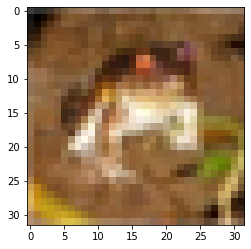

In [25]:
plt.imshow(X_train[0])

In [26]:
cnn.evaluate(X_test_stand,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9669 - accuracy: 0.7525


[0.9669458866119385, 0.7524999976158142]

In [27]:
y_pred=cnn.predict(X_test_stand)

In [28]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [6, 8, 8, 0, 6, 6, 1, 6, 3, 9]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [29]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      1000
           1       0.88      0.85      0.86      1000
           2       0.68      0.70      0.69      1000
           3       0.57      0.50      0.53      1000
           4       0.75      0.69      0.71      1000
           5       0.63      0.69      0.66      1000
           6       0.80      0.82      0.81      1000
           7       0.78      0.80      0.79      1000
           8       0.85      0.85      0.85      1000
           9       0.82      0.84      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



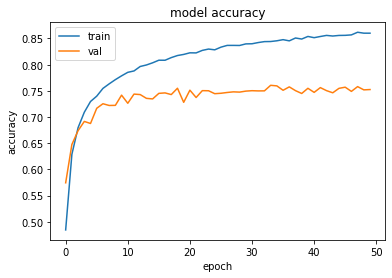

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

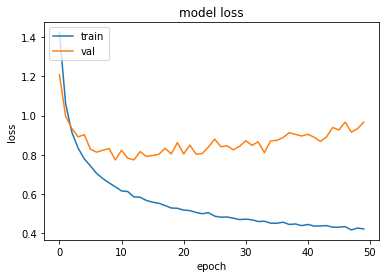

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <span style= 'color:black'><h4> 3/ </h4> </span>
---

->a l epochs 50 ,l accuracy diminue pour validation 0.86 mais augmente pour le test 0.72 de sorte soit proche de celle de validation ,de plus pour le loss les deux courbe de validation et test se commence a s approcher l une de l autre pour etre presque confondue ,loss diminue pour validation 0.9 et pour le train tends vers valeur proche de 0 .on a commencer de eviter le sur -apprentissage

# <span style= 'color:black'><h4> 4/ </h4> </span>
---

cette approche par symétrie horizontale est utlisable dans le cas de connaisance de classe de l image  il nous aide beaucoup a entrainer notre model en generant d 'autre image de  meme classe pour chaque image de dataset pour detecter notre objet et le bien classifier ,comme notre cas ici les donnees de cifar10,mais dans le cas de reconnaisance de texte ou nombre dans l image ,telque ocr technique ou donnees mnist,ou image des lettres a passer au model pour s entrainer ,cette transformation est n'est pas pratique  .

# <span style= 'color:black'><h4> 5/ </h4> </span>
---

le limite de ce type de data augmentation est dans l extraction des donnes de l'image et la reconnaisance de texte ou nombre de l image ,ce technique n est pas faisable

# <span style= 'color:black'><h4> 6/ </h4> </span>
---

-Rotation ( range 0-360 degrees)

-Shear range (image is shifted along x-axis or y-axis)(translation)

-flipping (true or false for horizontal flip and vertical flip )(utliser horizontal)

-Brightness or Contrast range ( image is made lighter or darker)

-Cropping ( resize the image )(utlisee deja)

-Scale ( image is scaled outward or inward )

-Saturation ( depth or intensity of the image)

-zoom the image 

In [19]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),

    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomRotation(0.3)
   
   
])

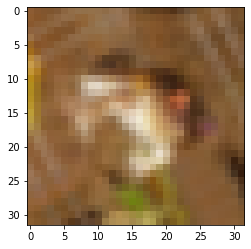

In [32]:
plt.imshow(data_augmentation(X_train)[0].numpy().astype("uint8"))#convert to numpy array

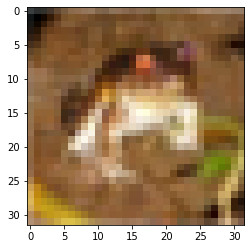

In [33]:
plt.imshow(X_train[0])

In [20]:
cnn = models.Sequential([
    data_augmentation,
  
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=1,activation='relu',padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5),strides=1, activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1,activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2,padding='same'),
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history=cnn.fit(X_train_stand, y_train, epochs=50,validation_data=(X_test_stand, y_test))

Epoch 1/50
1563/1563 [==============================] - 19s 8ms/step - loss: 1.7619 - accuracy: 0.3629 - val_loss: 1.7227 - val_accuracy: 0.3758
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5492 - accuracy: 0.4438 - val_loss: 1.6252 - val_accuracy: 0.4158
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4391 - accuracy: 0.4841 - val_loss: 1.5585 - val_accuracy: 0.4493
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3829 - accuracy: 0.5063 - val_loss: 1.4574 - val_accuracy: 0.4810
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3363 - accuracy: 0.5255 - val_loss: 1.5006 - val_accuracy: 0.4807
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2922 - accuracy: 0.5422 - val_loss: 1.3818 - val_accuracy: 0.5120
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2647 - accuracy: 0.5492 - val_loss: 1.4815 - val_ac

In [23]:
cnn.evaluate(X_test_stand,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4083 - accuracy: 0.5712


[1.4083081483840942, 0.5712000131607056]

In [24]:
y_pred=cnn.predict(X_test_stand)

In [25]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [3, 8, 0, 0, 6, 6, 1, 6, 6, 1]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [26]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1000
           1       0.69      0.65      0.67      1000
           2       0.60      0.31      0.41      1000
           3       0.46      0.30      0.36      1000
           4       0.56      0.43      0.48      1000
           5       0.54      0.45      0.49      1000
           6       0.53      0.78      0.63      1000
           7       0.59      0.66      0.62      1000
           8       0.71      0.67      0.69      1000
           9       0.47      0.80      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.56     10000
weighted avg       0.58      0.57      0.56     10000



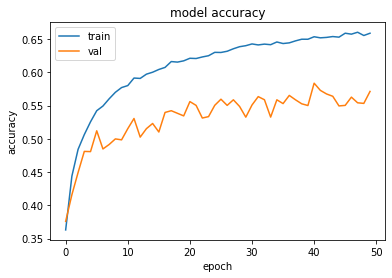

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

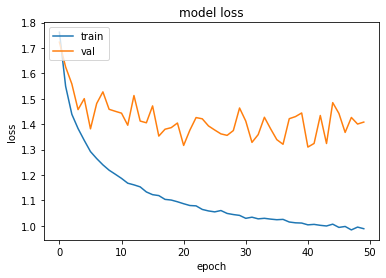

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <span style= 'color:blue'><h1> Partie 5: Régularisation du réseau par dropout:</h1> </span>
---

# <span style= 'color:black'><h4> 1/ </h4> </span>
---

In [19]:
cnn = models.Sequential([
    data_augmentation_train,
  
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=1,activation='relu',padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5),strides=1, activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1,activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=2,padding='same'),
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.2),#best 0.2 generalization
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history=cnn.fit(X_train_stand, y_train, epochs=50,validation_data=(X_test_stand, y_test))

Epoch 1/50
1563/1563 [==============================] - 17s 8ms/step - loss: 1.4125 - accuracy: 0.4885 - val_loss: 1.2026 - val_accuracy: 0.5761
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0545 - accuracy: 0.6322 - val_loss: 0.9723 - val_accuracy: 0.6695
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9202 - accuracy: 0.6788 - val_loss: 0.9555 - val_accuracy: 0.6702
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8488 - accuracy: 0.7058 - val_loss: 0.8558 - val_accuracy: 0.7106
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7986 - accuracy: 0.7241 - val_loss: 0.8268 - val_accuracy: 0.7210
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7642 - accuracy: 0.7357 - val_loss: 0.8269 - val_accuracy: 0.7245
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7266 - accuracy: 0.7484 - val_loss: 0.8198 - val_ac

In [22]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)         

In [23]:
cnn.evaluate(X_test_stand,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8236 - accuracy: 0.7566


[0.8235969543457031, 0.756600022315979]

In [24]:
y_pred=cnn.predict(X_test_stand)

In [25]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [3, 8, 8, 8, 6, 6, 1, 6, 3, 1]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [26]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.87      0.87      0.87      1000
           2       0.75      0.65      0.69      1000
           3       0.52      0.69      0.59      1000
           4       0.80      0.67      0.73      1000
           5       0.73      0.65      0.69      1000
           6       0.78      0.81      0.80      1000
           7       0.80      0.81      0.81      1000
           8       0.80      0.86      0.83      1000
           9       0.87      0.78      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



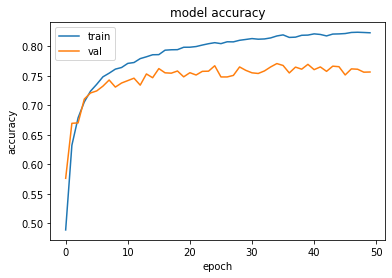

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

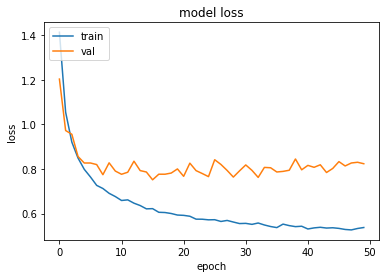

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <span style= 'color:black'><h4> 2/ </h4> </span>
---

->l accuracy pour train est 0.82 diminue un peu  tandis que 0.75 il augmente un peu pour validation a la 50 epochs sont trop proche ,de plus les deux courbe de loss de validation et train semble a etre presque confondue a certain epochs 
,presque overfitting commence a disparaitre 

# <span style= 'color:black'><h4> 3/ </h4> </span>
---

La régularisation du réseau a pour principal objectif de prévenir le sur apprentissage (overfitting). Celle ci, va pouvoir via différentes techniques, permettre de gérer les éventuels débordements des paramètres du réseau au cours de l’entrainement.

# <span style= 'color:black'><h4> 4/ </h4> </span>
---

-Dropout : On va souhaiter favoriser l’extraction de caractéristique de façon indépendante, afin d’apprendre des caractéristique plus général et plus diverse. Cela va consister à ‘éteindre’, à désactiver certains neurones du modèle, et ce de façon aléatoire d’une même couche, qui ne contribuera donc ni à la phase de feedforward, ni à la phase de backpropagation. D’un point de vue du réseau, cela revient à instancier la valeur en sortie d’une fonction d’activation à 0.
Le Dropout est une technique permettant de réduire l’overfitting lors de l’entraînement du modèle.


-L’idée est de perturber les caractéristiques apprises par le modèle. Habituellement, l’apprentissage du modèle repose sur la synchronicité des neurones… avec le Dropout, le modèle doit exploiter chaque neurone individuellement, ses voisins pouvant être désactivés aléatoirement à tout instant.

# <span style= 'color:black'><h4> 5/ </h4> </span>
---

-l'hyperparamètre est introduit qui spécifie la probabilité à laquelle les sorties de la couche sont supprimées, ou inversement, la probabilité à laquelle les sorties de la couche sont conservées.

-Le choix des neurones à désactiver est aléatoire. On attribue une probabilité p à tous les neurones qui détermine leur activation.
Lorsque p = 0.2, chaque neurone a une  2  chance sur 10 d’être désactivé.
À chaque epoch, on applique cette désactivation aléatoire. C’est-à-dire qu’à chaque passe (forward propagation) le modèle apprendra avec une configuration de neurones différentes, les neurones s’activant et se désactivant aléatoirement.
Cette procédure génère effectivement des modèles légèrement différents avec des configurations de neurones différentes à chaque itération.

# <span style= 'color:black'><h4> 6/ </h4> </span>
---

le Dropout est actif uniquement durant l’entraînement du modèle. Lors des tests, chaque neurone reste actif et son poids est multiplié par la probabilité p(notre cas p = 0.2 ).

# <span style= 'color:blue'><h1> Partie 6: Utilisation de batch normalization:</h1> </span>
---

# <span style= 'color:black'><h4> 1/ </h4> </span>
---

In [19]:
cnn = models.Sequential([
    data_augmentation_train,
  
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=1,activation='relu',padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5),strides=1, activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1,activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),strides=2,padding='same'),
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.2),#best 0.2 generalization
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history=cnn.fit(X_train_stand, y_train, epochs=50,validation_data=(X_test_stand, y_test))

Epoch 1/50
1563/1563 [==============================] - 16s 8ms/step - loss: 1.3949 - accuracy: 0.5079 - val_loss: 1.1094 - val_accuracy: 0.6124
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0068 - accuracy: 0.6460 - val_loss: 0.9260 - val_accuracy: 0.6834
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8620 - accuracy: 0.7024 - val_loss: 0.9063 - val_accuracy: 0.6968
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7877 - accuracy: 0.7288 - val_loss: 0.7818 - val_accuracy: 0.7298
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7135 - accuracy: 0.7521 - val_loss: 0.7545 - val_accuracy: 0.7433
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6644 - accuracy: 0.7698 - val_loss: 0.7105 - val_accuracy: 0.7578
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6262 - accuracy: 0.7835 - val_loss: 0.6841 - val_ac

In [22]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)      

In [23]:
cnn.evaluate(X_test_stand,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6337 - accuracy: 0.8344


[0.6337482929229736, 0.8343999981880188]

In [24]:
y_pred=cnn.predict(X_test_stand)

In [25]:
y_classes=[np.argmax(item) for item in y_pred]
print("class_predict : ",y_classes[:10])
print("class_juste : ",y_test[:10])

class_predict :  [3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
class_juste :  [3 8 8 0 6 6 1 6 3 1]


In [26]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.95      0.88      0.91      1000
           2       0.79      0.78      0.79      1000
           3       0.69      0.70      0.70      1000
           4       0.78      0.85      0.82      1000
           5       0.80      0.73      0.76      1000
           6       0.89      0.85      0.87      1000
           7       0.89      0.86      0.87      1000
           8       0.87      0.91      0.89      1000
           9       0.86      0.91      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



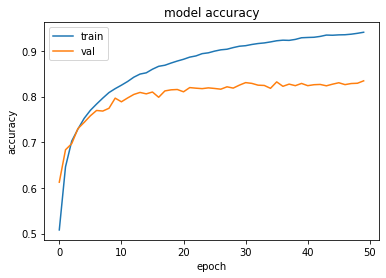

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

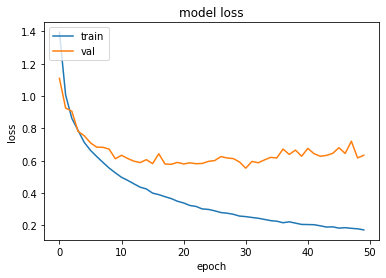

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <span style= 'color:black'><h4> 2/ </h4> </span>
---

batch Normalisation est  une technique qui permet de faciliter l'entraînement des réseaux de neurones. Elle présente deux avantages majeurs : taux d'apprentissage (learni g rate) plus élevé et baisse de l'importance des paramètres d'initialisation du réseau. Ce qui veut dire que concrètement le réseau apprend plus vite avec moins de ressources consommées.

L'idée générale est que les poids optimaux des neurones du réseau sont calculés après que plusieurs "exemples aient été montrés au réseau" (batch) et en normalisant les valeurs qui sont entrées dans les neurones. Cette normalisation se fait une fois par batch en faisant en sorte que les valeurs d'entrée soient entre des minimums et des maximum acceptables.

-> l accuracy est amelioree pour  train 0.94 et 0.84 pour validation pour la 50 epochs ,les deux valeur reste trop proche ,le loss diminue pour la validation tandis que il reste encore tends vers valeur proche de 0 pour train ,encore les deux 
courbe semble a etre presque confondue pour le loss a partir d un certain epochs ,on a ameliorer les resultats en s eloignant toujours de sur-apprentissage

->meilleur resulats de loss 0.6 pour validation et 0.1 pour train ,et de accuracy 0.94 train et 0.84 validation en evitant mieux l overfitting  

# <span style= 'color:red'><h1> FIN</h1> </span>
---